# Time Series Forecasting with ARIMAX, SARIMAX and PROPHET
## by Vesna Pop-Dimitrijoska
---

WebTrafic dataset, device: **MOBILE**

---

# Task

Time Series Forecasting with ARIMA, SARIMA and PROPHET the Web Traffic dataset for each device type (separately) and forecast the total cumulaive traffic. 

---
## Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import itertools
from summarytools import dfSummary
import matplotlib.pyplot as plt
import seaborn as sns

#Time-series Forecasting
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import prophet
from prophet.plot import plot_plotly, plot_components_plotly

from sklearn.model_selection import ParameterGrid

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Read the Dataset

In [2]:
df_org = pd.read_csv('df_mobile_final.csv',index_col=0, parse_dates=['Date'])
df = df_org.copy()

## Train-test split

In [3]:
# Train-test split 
train_mobile = df.loc[df.index <  pd.Timestamp('2018-04-01')]
test_mobile  = df.loc[df.index >= pd.Timestamp('2018-04-01')]

In [4]:
# Generate all different combinations of p, q and q triplets

p = range(0, 15)
d = range(0, 5)
q = range(0, 5)

pdq = list(itertools.product(p, d, q))

---
## Time Series Forecasting with ARIMA

In [5]:
best_mape = float('inf')
best_order = None

for order in pdq:
    p, d, q = order
    model_ARIMA = ARIMA(train_mobile['Sessions'],
                  exog=None,
                  order=(p, d, q),
                  seasonal_order=(0, 0, 0, 0), 
                  trend=None, 
                  enforce_stationarity=True, 
                  freq='D')
    
    results = model_ARIMA.fit()
    results = results.forecast(steps=len(test_mobile))
   
    mape = mean_absolute_percentage_error(test_mobile['Sessions'], results)
    print(f'(p, d, q) order: {order}, with MAPE = {round(mape*100, 2)}%')

    if mape < best_mape:
        best_mape = mape
        best_order = order
        
print('-------------------------------------------------')
print('Best model:')
print(f'(p, d, q) -> {best_order} with MAPE = {round(best_mape*100, 2)}%')


(p, d, q) order: (0, 0, 0), with MAPE = 1.51%
(p, d, q) order: (0, 0, 1), with MAPE = 1.5%
(p, d, q) order: (0, 0, 2), with MAPE = 1.5%
(p, d, q) order: (0, 0, 3), with MAPE = 1.51%
(p, d, q) order: (0, 0, 4), with MAPE = 1.51%
(p, d, q) order: (0, 1, 0), with MAPE = 1.55%
(p, d, q) order: (0, 1, 1), with MAPE = 1.42%
(p, d, q) order: (0, 1, 2), with MAPE = 1.44%
(p, d, q) order: (0, 1, 3), with MAPE = 1.46%
(p, d, q) order: (0, 1, 4), with MAPE = 1.41%
(p, d, q) order: (0, 2, 0), with MAPE = 230.82%
(p, d, q) order: (0, 2, 1), with MAPE = 1.53%
(p, d, q) order: (0, 2, 2), with MAPE = 1.49%
(p, d, q) order: (0, 2, 3), with MAPE = 1.51%
(p, d, q) order: (0, 2, 4), with MAPE = 1.5%
(p, d, q) order: (0, 3, 0), with MAPE = 15875.32%
(p, d, q) order: (0, 3, 1), with MAPE = 243.39%
(p, d, q) order: (0, 3, 2), with MAPE = 10.91%
(p, d, q) order: (0, 3, 3), with MAPE = 1.37%
(p, d, q) order: (0, 3, 4), with MAPE = 2.15%
(p, d, q) order: (0, 4, 0), with MAPE = 1168631.64%
(p, d, q) order: (0, 4

(p, d, q) order: (7, 0, 1), with MAPE = 1.47%
(p, d, q) order: (7, 0, 2), with MAPE = 1.45%
(p, d, q) order: (7, 0, 3), with MAPE = 1.31%
(p, d, q) order: (7, 0, 4), with MAPE = 1.1%
(p, d, q) order: (7, 1, 0), with MAPE = 1.56%
(p, d, q) order: (7, 1, 1), with MAPE = 1.56%
(p, d, q) order: (7, 1, 2), with MAPE = 1.53%
(p, d, q) order: (7, 1, 3), with MAPE = 1.42%
(p, d, q) order: (7, 1, 4), with MAPE = 1.4%
(p, d, q) order: (7, 2, 0), with MAPE = 3.24%
(p, d, q) order: (7, 2, 1), with MAPE = 1.57%
(p, d, q) order: (7, 2, 2), with MAPE = 1.58%
(p, d, q) order: (7, 2, 3), with MAPE = 1.47%
(p, d, q) order: (7, 2, 4), with MAPE = 1.64%
(p, d, q) order: (7, 3, 0), with MAPE = 1116.96%
(p, d, q) order: (7, 3, 1), with MAPE = 6.91%
(p, d, q) order: (7, 3, 2), with MAPE = 22.97%
(p, d, q) order: (7, 3, 3), with MAPE = 2.15%
(p, d, q) order: (7, 3, 4), with MAPE = 17.66%
(p, d, q) order: (7, 4, 0), with MAPE = 30064.11%
(p, d, q) order: (7, 4, 1), with MAPE = 1118.14%
(p, d, q) order: (7, 4, 

(p, d, q) order: (14, 0, 0), with MAPE = 1.32%
(p, d, q) order: (14, 0, 1), with MAPE = 1.34%
(p, d, q) order: (14, 0, 2), with MAPE = 1.34%
(p, d, q) order: (14, 0, 3), with MAPE = 1.34%
(p, d, q) order: (14, 0, 4), with MAPE = 1.09%
(p, d, q) order: (14, 1, 0), with MAPE = 1.35%
(p, d, q) order: (14, 1, 1), with MAPE = 1.35%
(p, d, q) order: (14, 1, 2), with MAPE = 1.34%
(p, d, q) order: (14, 1, 3), with MAPE = 1.35%
(p, d, q) order: (14, 1, 4), with MAPE = 1.33%
(p, d, q) order: (14, 2, 0), with MAPE = 8.81%
(p, d, q) order: (14, 2, 1), with MAPE = 1.1%
(p, d, q) order: (14, 2, 2), with MAPE = 1.31%
(p, d, q) order: (14, 2, 3), with MAPE = 1.14%
(p, d, q) order: (14, 2, 4), with MAPE = 1.18%
(p, d, q) order: (14, 3, 0), with MAPE = 205.2%
(p, d, q) order: (14, 3, 1), with MAPE = 18.91%
(p, d, q) order: (14, 3, 2), with MAPE = 17.33%
(p, d, q) order: (14, 3, 3), with MAPE = 10.43%
(p, d, q) order: (14, 3, 4), with MAPE = 4.53%
(p, d, q) order: (14, 4, 0), with MAPE = 10461.87%
(p, d,

In [6]:
model_ARIMA = ARIMA(train_mobile['Sessions'],
              exog=None,
              order = (best_order[0], best_order[1], best_order[2]),
              seasonal_order=(0, 0, 0, 0), 
              trend=None, 
              enforce_stationarity=True, 
              freq='D')

results = model_ARIMA.fit()
print(results.summary())

results = results.forecast(steps = len(test_mobile))

                               SARIMAX Results                                
Dep. Variable:               Sessions   No. Observations:                 1551
Model:                ARIMA(14, 0, 4)   Log Likelihood                 693.081
Date:                Sat, 21 Oct 2023   AIC                          -1346.162
Time:                        21:03:13   BIC                          -1239.229
Sample:                    01-01-2014   HQIC                         -1306.392
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4585      0.241     55.794      0.000      12.986      13.931
ar.L1         -0.0049      0.057     -0.086      0.931      -0.116       0.106
ar.L2          0.2453      0.061      4.003      0.0

In [7]:
y_test = test_mobile['Sessions']
y_pred = results

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Preformance metrics for ARIMA model:')
print('--------------------------------------')
print('MAE:   ', round(mae, 2))
print('RMSE:  ', round(rmse, 2))
print('R2:    ', round(r2*100, 2))
print('MAPE:  ', round(mape*100, 2), '%')

Preformance metrics for ARIMA model:
--------------------------------------
MAE:    0.15
RMSE:   0.19
R2:     22.15
MAPE:   1.09 %


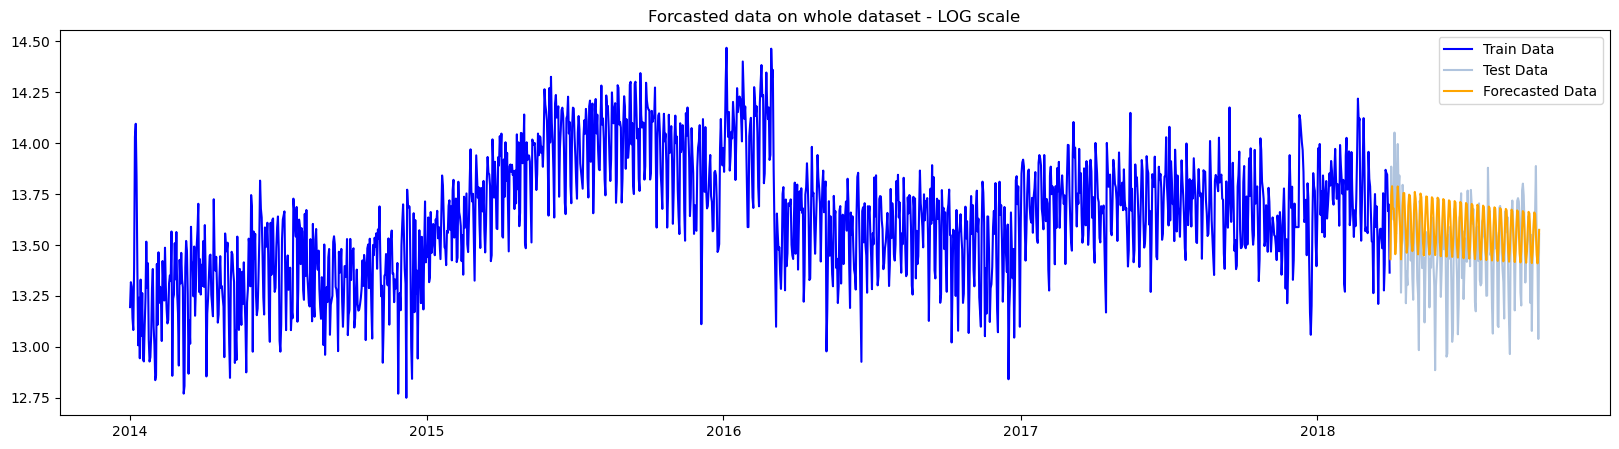

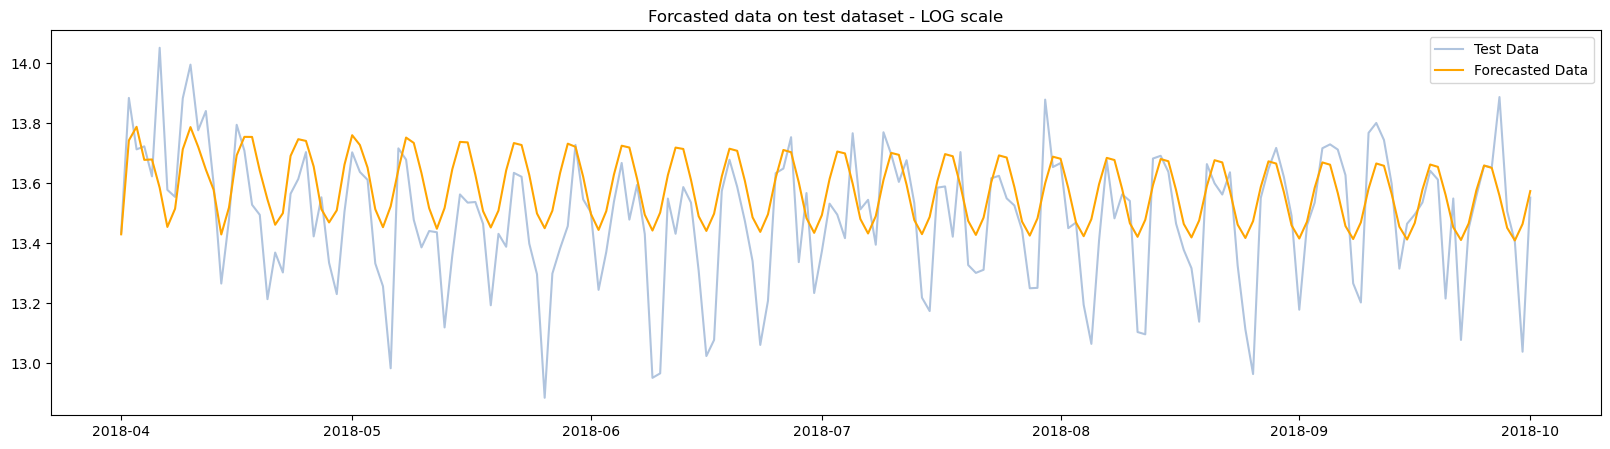

In [8]:
# Forcasted data in LOG scale

Train = train_mobile['Sessions']
Test = test_mobile['Sessions']
Forecast = results

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - LOG scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - LOG scale')
plt.legend()
plt.show()

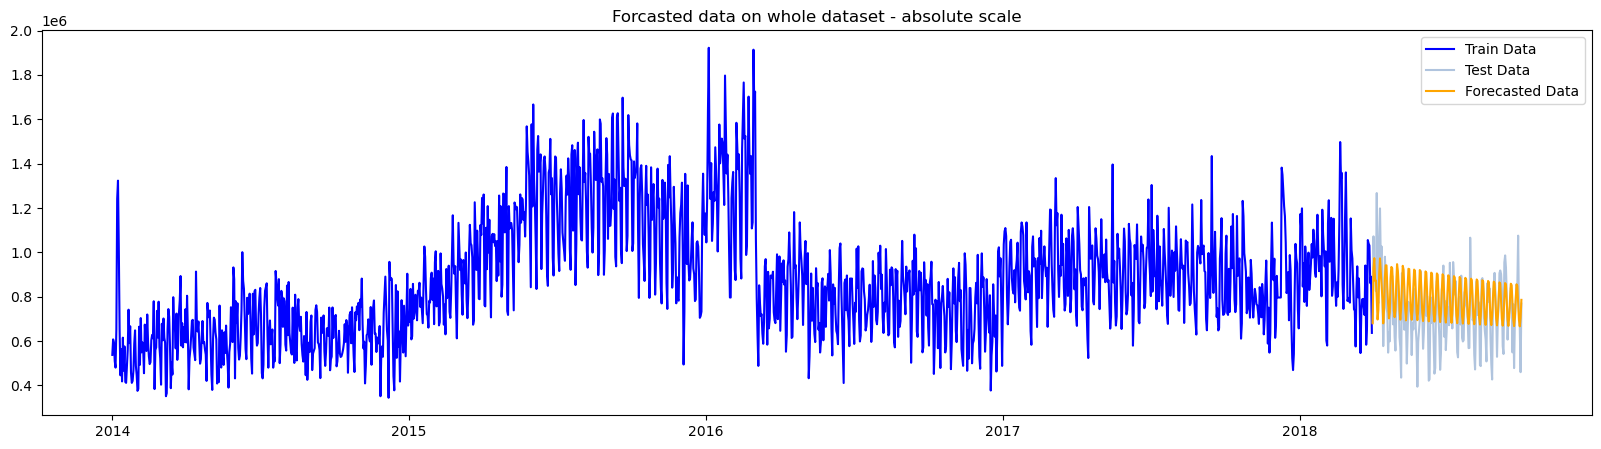

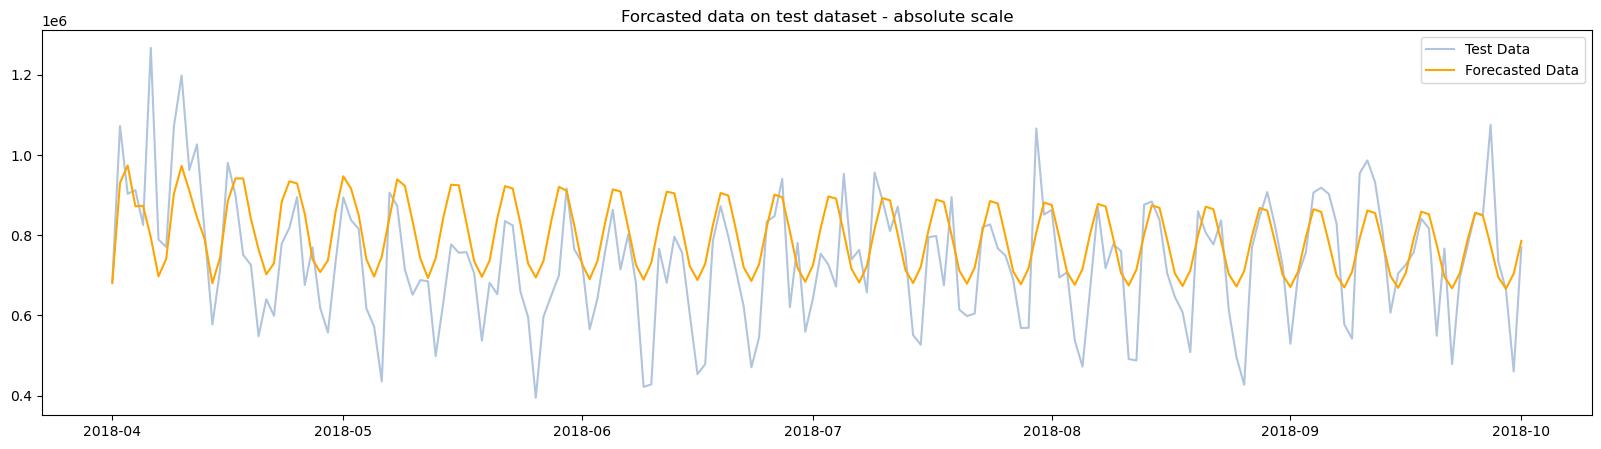

In [9]:
# Forcasted data in absolute scale

Train = np.exp(train_mobile['Sessions'])
Test = np.exp(test_mobile['Sessions'])
Forecast = np.exp(results)

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - absolute scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - absolute scale')
plt.legend()
plt.show()

---
## Time Series Forecasting with SARIMA

In [10]:
# Generate all different combinations of p, q and q triplets

p = range(0, 11)
d = range(0, 5)
q = range(0, 5)

pdq = list(itertools.product(p, d, q))

In [11]:
best_mape = float('inf')
best_order = None

for order in pdq:
    p, d, q = order

    model_SARIMA = SARIMAX(train_mobile['Sessions'], 
                    exog=None,
                    order=(p, d, q),
                    seasonal_order=(0, 0, 0, 7),
                    trend=None,
                    enforce_stationarity=True,
                    enforce_invertibility=False, 
                    freq='D')
    
    results = model_SARIMA.fit()
    results = results.forecast(steps=len(test_mobile))
   
    mape = mean_absolute_percentage_error(test_mobile['Sessions'], results)
    print(f'(p, d, q) order: {order}, with MAPE = {round(mape*100, 2)}%')

    if mape < best_mape:
        best_mape = mape
        best_order = order
        
print('-------------------------------------------------')
print('Best model:')
print(f'(p, d, q) -> {best_order} with MAPE = {round(best_mape*100, 2)}%')


(p, d, q) order: (0, 0, 0), with MAPE = 100.0%
(p, d, q) order: (0, 0, 1), with MAPE = 99.75%
(p, d, q) order: (0, 0, 2), with MAPE = 99.44%
(p, d, q) order: (0, 0, 3), with MAPE = 99.25%
(p, d, q) order: (0, 0, 4), with MAPE = 99.1%
(p, d, q) order: (0, 1, 0), with MAPE = 1.55%
(p, d, q) order: (0, 1, 1), with MAPE = 1.42%
(p, d, q) order: (0, 1, 2), with MAPE = 1.44%
(p, d, q) order: (0, 1, 3), with MAPE = 1.46%
(p, d, q) order: (0, 1, 4), with MAPE = 1.41%
(p, d, q) order: (0, 2, 0), with MAPE = 230.82%
(p, d, q) order: (0, 2, 1), with MAPE = 1.52%
(p, d, q) order: (0, 2, 2), with MAPE = 1.49%
(p, d, q) order: (0, 2, 3), with MAPE = 1.52%
(p, d, q) order: (0, 2, 4), with MAPE = 1.47%
(p, d, q) order: (0, 3, 0), with MAPE = 15875.32%
(p, d, q) order: (0, 3, 1), with MAPE = 243.38%
(p, d, q) order: (0, 3, 2), with MAPE = 9.91%
(p, d, q) order: (0, 3, 3), with MAPE = 15.97%
(p, d, q) order: (0, 3, 4), with MAPE = 1.35%
(p, d, q) order: (0, 4, 0), with MAPE = 1168631.64%
(p, d, q) order

(p, d, q) order: (7, 0, 0), with MAPE = 1.39%
(p, d, q) order: (7, 0, 1), with MAPE = 1.36%
(p, d, q) order: (7, 0, 2), with MAPE = 1.32%
(p, d, q) order: (7, 0, 3), with MAPE = 1.42%
(p, d, q) order: (7, 0, 4), with MAPE = 1.33%
(p, d, q) order: (7, 1, 0), with MAPE = 1.56%
(p, d, q) order: (7, 1, 1), with MAPE = 1.56%
(p, d, q) order: (7, 1, 2), with MAPE = 1.53%
(p, d, q) order: (7, 1, 3), with MAPE = 1.44%
(p, d, q) order: (7, 1, 4), with MAPE = 1.53%
(p, d, q) order: (7, 2, 0), with MAPE = 3.24%
(p, d, q) order: (7, 2, 1), with MAPE = 1.67%
(p, d, q) order: (7, 2, 2), with MAPE = 1.68%
(p, d, q) order: (7, 2, 3), with MAPE = 1.65%
(p, d, q) order: (7, 2, 4), with MAPE = 1.65%
(p, d, q) order: (7, 3, 0), with MAPE = 1116.96%
(p, d, q) order: (7, 3, 1), with MAPE = 6.35%
(p, d, q) order: (7, 3, 2), with MAPE = 1.66%
(p, d, q) order: (7, 3, 3), with MAPE = 1.37%
(p, d, q) order: (7, 3, 4), with MAPE = 1.49%
(p, d, q) order: (7, 4, 0), with MAPE = 30064.11%
(p, d, q) order: (7, 4, 1),

In [12]:
model_SARIMA = SARIMAX(train_mobile['Sessions'], 
                exog=None,
                order=(best_order[0], best_order[1], best_order[2]),
                seasonal_order=(0, 0, 0, 7),
                trend=None,
                enforce_stationarity=True,
                enforce_invertibility=False, 
                freq='D')

results = model_SARIMA.fit()
print(results.summary())

results = results.forecast(steps = len(test_mobile))

                               SARIMAX Results                                
Dep. Variable:               Sessions   No. Observations:                 1551
Model:               SARIMAX(5, 1, 4)   Log Likelihood                 648.349
Date:                Sat, 21 Oct 2023   AIC                          -1276.698
Time:                        21:19:31   BIC                          -1223.238
Sample:                    01-01-2014   HQIC                         -1256.815
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3564      0.022     15.924      0.000       0.312       0.400
ar.L2         -1.0848      0.018    -59.395      0.000      -1.121      -1.049
ar.L3          0.1558      0.032      4.825      0.0

In [13]:
y_test = test_mobile['Sessions']
y_pred = results

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Preformance metrics for SARIMA model:')
print('--------------------------------------')
print('MAE:   ', round(mae, 2))
print('RMSE:  ', round(rmse, 2))
print('R2:    ', round(r2*100, 2))
print('MAPE:  ', round(mape*100, 2), '%')

Preformance metrics for SARIMA model:
--------------------------------------
MAE:    0.16
RMSE:   0.2
R2:     13.84
MAPE:   1.19 %


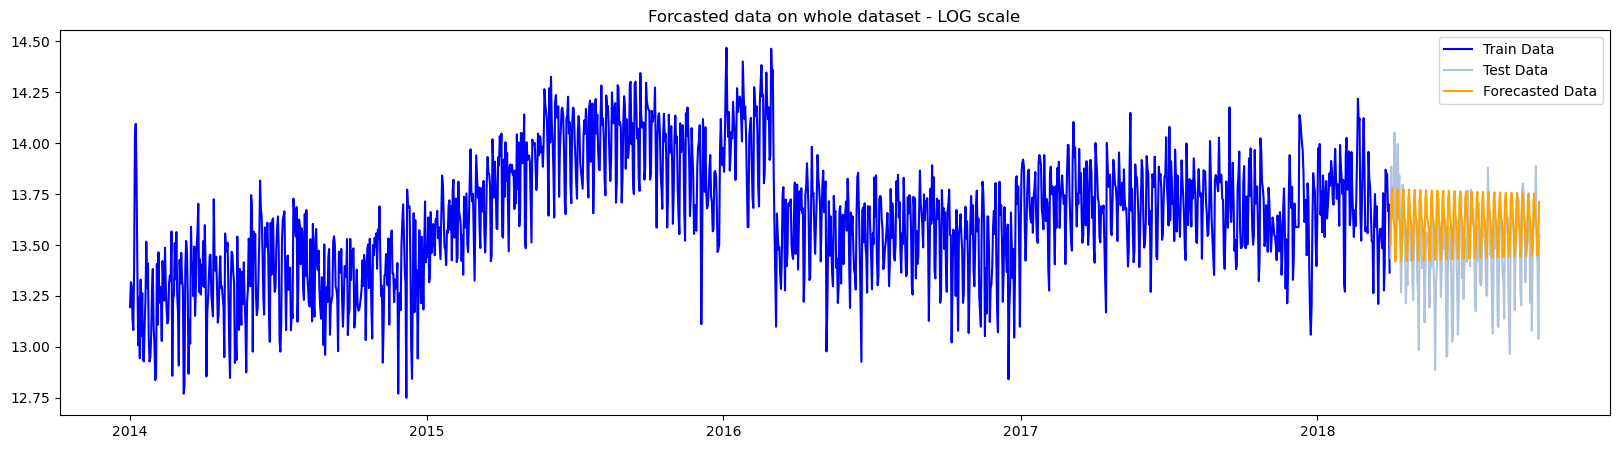

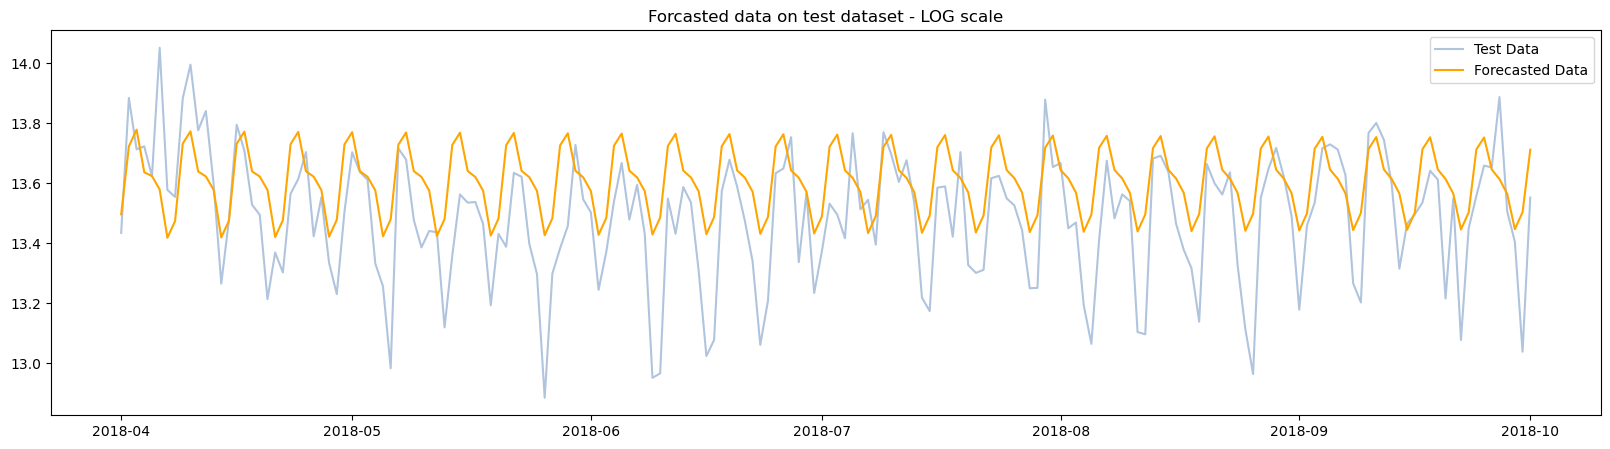

In [14]:
# Forcasted data in LOG scale

Train = train_mobile['Sessions']
Test = test_mobile['Sessions']
Forecast = results

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - LOG scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - LOG scale')
plt.legend()
plt.show()

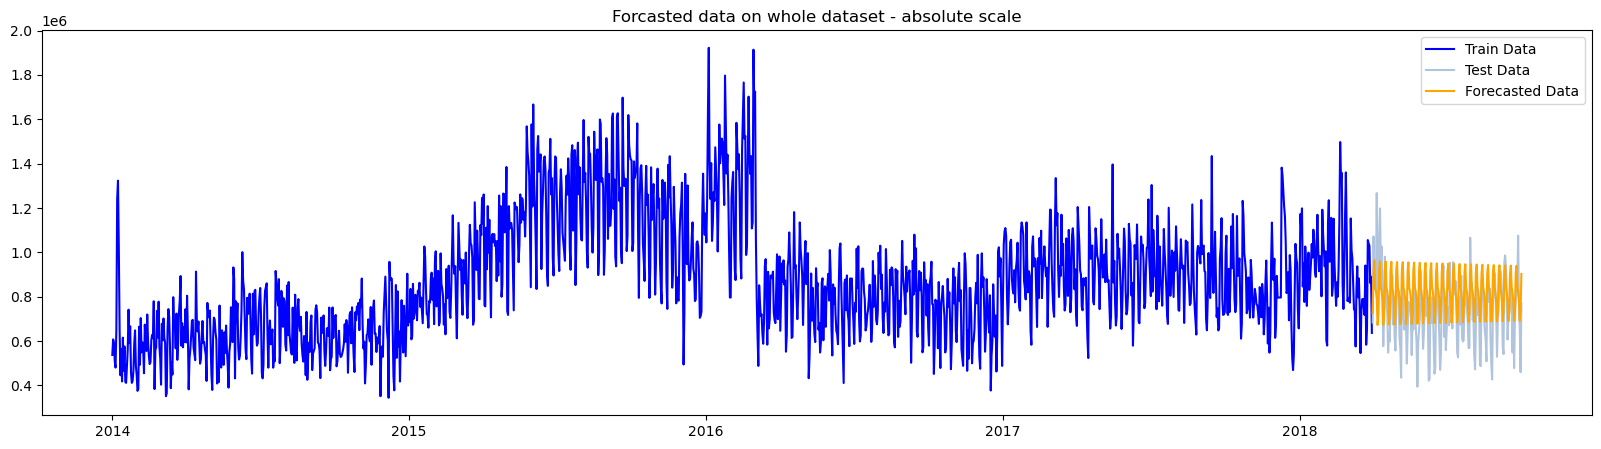

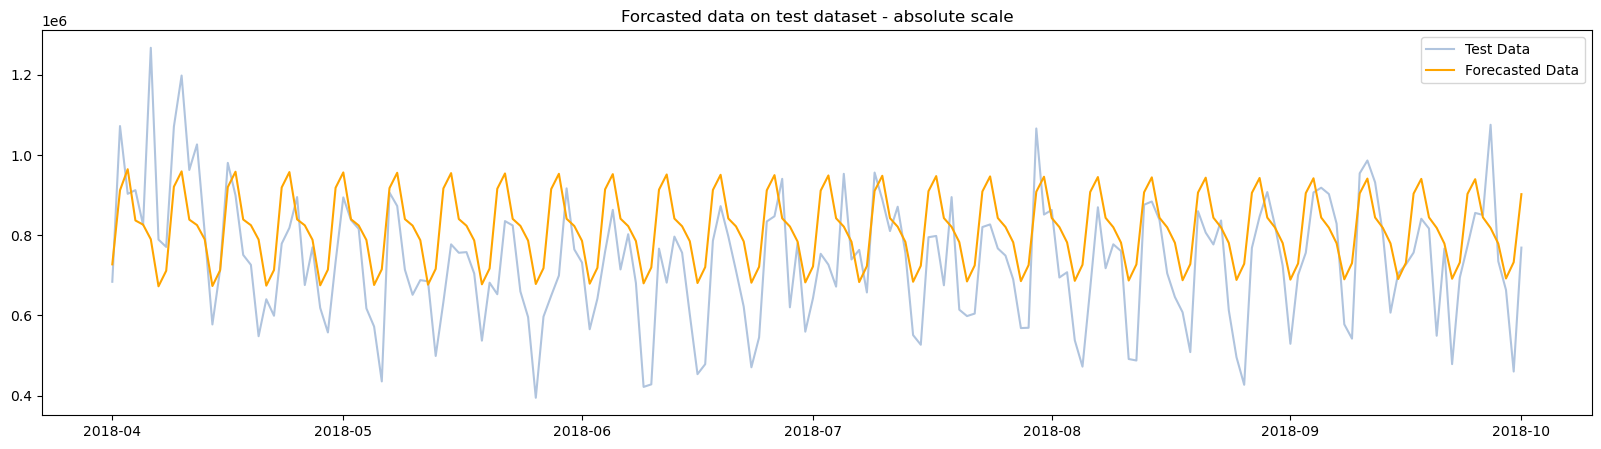

In [15]:
# Forcasted data in absolute scale

Train = np.exp(train_mobile['Sessions'])
Test = np.exp(test_mobile['Sessions'])
Forecast = np.exp(results)

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - absolute scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - absolute scale')
plt.legend()
plt.show()

#
---
## Time Series Forecasting with PROPHET

In [16]:
df_org = pd.read_csv('df_mobile_final.csv', parse_dates=['Date'])
df = df_org.copy()

In [17]:
df.rename(columns={'Date': 'ds', 'Sessions': 'y'}, inplace=True)

In [18]:
# Train-test split 
train_mobile = df.loc[df['ds'] <  pd.Timestamp('2018-04-01')]
test_mobile  = df.loc[df['ds'] >= pd.Timestamp('2018-04-01')]

In [19]:
parameters = {
    'n_changepoints': [10, 13, 14, 15, 16, 17, 18, 20], 
    'changepoint_range': np.arange(0.80, 0.90, 0.01)}

parameter_grid = ParameterGrid(parameters)

best_mape = float('inf')
best_parameters = None

for param_set in parameter_grid:
    n_changepoints = param_set['n_changepoints']
    changepoint_range = param_set['changepoint_range']
    
    model = prophet.Prophet(
        growth='linear',
        changepoints=None,
        n_changepoints=n_changepoints,
        changepoint_range=changepoint_range,
        yearly_seasonality='auto',
        weekly_seasonality='auto',
        daily_seasonality='auto',
        holidays=None
    )
    
    model.fit(train_mobile)
    
    future = model.make_future_dataframe(periods=test_mobile.shape[0], freq='D')
    results = model.predict(future)
    
    mape = mean_absolute_percentage_error(test_mobile['y'], results['yhat'][-len(test_mobile['y']):])
    
    print(f'MAPE = {round(mape*100, 2)}% - n_changepoints = {n_changepoints}, changepoint_range = {changepoint_range}')
    
    if mape < best_mape:
        best_mape = mape
        best_parameters = param_set

print(f'Best parameters: {best_parameters}, MAPE = {round(best_mape*100, 2)}%')

21:19:34 - cmdstanpy - INFO - Chain [1] start processing
21:19:34 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.7% - n_changepoints = 10, changepoint_range = 0.8


21:19:35 - cmdstanpy - INFO - Chain [1] start processing
21:19:35 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.75% - n_changepoints = 13, changepoint_range = 0.8


21:19:36 - cmdstanpy - INFO - Chain [1] start processing
21:19:36 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.57% - n_changepoints = 14, changepoint_range = 0.8


21:19:38 - cmdstanpy - INFO - Chain [1] start processing
21:19:38 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.85% - n_changepoints = 15, changepoint_range = 0.8


21:19:39 - cmdstanpy - INFO - Chain [1] start processing
21:19:39 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.71% - n_changepoints = 16, changepoint_range = 0.8


21:19:40 - cmdstanpy - INFO - Chain [1] start processing
21:19:40 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.7% - n_changepoints = 17, changepoint_range = 0.8


21:19:41 - cmdstanpy - INFO - Chain [1] start processing
21:19:41 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.85% - n_changepoints = 18, changepoint_range = 0.8


21:19:42 - cmdstanpy - INFO - Chain [1] start processing
21:19:42 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.77% - n_changepoints = 20, changepoint_range = 0.8


21:19:43 - cmdstanpy - INFO - Chain [1] start processing
21:19:43 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.72% - n_changepoints = 10, changepoint_range = 0.81


21:19:44 - cmdstanpy - INFO - Chain [1] start processing
21:19:44 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.8% - n_changepoints = 13, changepoint_range = 0.81


21:19:45 - cmdstanpy - INFO - Chain [1] start processing
21:19:45 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.68% - n_changepoints = 14, changepoint_range = 0.81


21:19:46 - cmdstanpy - INFO - Chain [1] start processing
21:19:47 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.82% - n_changepoints = 15, changepoint_range = 0.81


21:19:47 - cmdstanpy - INFO - Chain [1] start processing
21:19:48 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.76% - n_changepoints = 16, changepoint_range = 0.81


21:19:48 - cmdstanpy - INFO - Chain [1] start processing
21:19:49 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.71% - n_changepoints = 17, changepoint_range = 0.81


21:19:50 - cmdstanpy - INFO - Chain [1] start processing
21:19:50 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.87% - n_changepoints = 18, changepoint_range = 0.81


21:19:51 - cmdstanpy - INFO - Chain [1] start processing
21:19:51 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.74% - n_changepoints = 20, changepoint_range = 0.81


21:19:52 - cmdstanpy - INFO - Chain [1] start processing
21:19:52 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.72% - n_changepoints = 10, changepoint_range = 0.8200000000000001


21:19:53 - cmdstanpy - INFO - Chain [1] start processing
21:19:53 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.73% - n_changepoints = 13, changepoint_range = 0.8200000000000001


21:19:54 - cmdstanpy - INFO - Chain [1] start processing
21:19:54 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.64% - n_changepoints = 14, changepoint_range = 0.8200000000000001


21:19:55 - cmdstanpy - INFO - Chain [1] start processing
21:19:55 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.72% - n_changepoints = 15, changepoint_range = 0.8200000000000001


21:19:56 - cmdstanpy - INFO - Chain [1] start processing
21:19:56 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.5% - n_changepoints = 16, changepoint_range = 0.8200000000000001


21:19:57 - cmdstanpy - INFO - Chain [1] start processing
21:19:57 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.63% - n_changepoints = 17, changepoint_range = 0.8200000000000001


21:19:58 - cmdstanpy - INFO - Chain [1] start processing
21:19:59 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.69% - n_changepoints = 18, changepoint_range = 0.8200000000000001


21:19:59 - cmdstanpy - INFO - Chain [1] start processing
21:20:00 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.69% - n_changepoints = 20, changepoint_range = 0.8200000000000001


21:20:01 - cmdstanpy - INFO - Chain [1] start processing
21:20:01 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.84% - n_changepoints = 10, changepoint_range = 0.8300000000000001


21:20:02 - cmdstanpy - INFO - Chain [1] start processing
21:20:02 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.52% - n_changepoints = 13, changepoint_range = 0.8300000000000001


21:20:03 - cmdstanpy - INFO - Chain [1] start processing
21:20:03 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.63% - n_changepoints = 14, changepoint_range = 0.8300000000000001


21:20:04 - cmdstanpy - INFO - Chain [1] start processing
21:20:04 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.59% - n_changepoints = 15, changepoint_range = 0.8300000000000001


21:20:05 - cmdstanpy - INFO - Chain [1] start processing
21:20:05 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.57% - n_changepoints = 16, changepoint_range = 0.8300000000000001


21:20:06 - cmdstanpy - INFO - Chain [1] start processing
21:20:06 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.51% - n_changepoints = 17, changepoint_range = 0.8300000000000001


21:20:07 - cmdstanpy - INFO - Chain [1] start processing
21:20:07 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.49% - n_changepoints = 18, changepoint_range = 0.8300000000000001


21:20:08 - cmdstanpy - INFO - Chain [1] start processing
21:20:08 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.76% - n_changepoints = 20, changepoint_range = 0.8300000000000001


21:20:09 - cmdstanpy - INFO - Chain [1] start processing
21:20:10 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.67% - n_changepoints = 10, changepoint_range = 0.8400000000000001


21:20:10 - cmdstanpy - INFO - Chain [1] start processing
21:20:11 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.45% - n_changepoints = 13, changepoint_range = 0.8400000000000001


21:20:11 - cmdstanpy - INFO - Chain [1] start processing
21:20:12 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.58% - n_changepoints = 14, changepoint_range = 0.8400000000000001


21:20:12 - cmdstanpy - INFO - Chain [1] start processing
21:20:13 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.56% - n_changepoints = 15, changepoint_range = 0.8400000000000001


21:20:14 - cmdstanpy - INFO - Chain [1] start processing
21:20:14 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.66% - n_changepoints = 16, changepoint_range = 0.8400000000000001


21:20:15 - cmdstanpy - INFO - Chain [1] start processing
21:20:15 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.41% - n_changepoints = 17, changepoint_range = 0.8400000000000001


21:20:16 - cmdstanpy - INFO - Chain [1] start processing
21:20:16 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.4% - n_changepoints = 18, changepoint_range = 0.8400000000000001


21:20:17 - cmdstanpy - INFO - Chain [1] start processing
21:20:17 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.71% - n_changepoints = 20, changepoint_range = 0.8400000000000001


21:20:18 - cmdstanpy - INFO - Chain [1] start processing
21:20:18 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.39% - n_changepoints = 10, changepoint_range = 0.8500000000000001


21:20:19 - cmdstanpy - INFO - Chain [1] start processing
21:20:19 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.4% - n_changepoints = 13, changepoint_range = 0.8500000000000001


21:20:20 - cmdstanpy - INFO - Chain [1] start processing
21:20:20 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.41% - n_changepoints = 14, changepoint_range = 0.8500000000000001


21:20:21 - cmdstanpy - INFO - Chain [1] start processing
21:20:21 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.39% - n_changepoints = 15, changepoint_range = 0.8500000000000001


21:20:22 - cmdstanpy - INFO - Chain [1] start processing
21:20:22 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.67% - n_changepoints = 16, changepoint_range = 0.8500000000000001


21:20:23 - cmdstanpy - INFO - Chain [1] start processing
21:20:23 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.29% - n_changepoints = 17, changepoint_range = 0.8500000000000001


21:20:24 - cmdstanpy - INFO - Chain [1] start processing
21:20:24 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.56% - n_changepoints = 18, changepoint_range = 0.8500000000000001


21:20:25 - cmdstanpy - INFO - Chain [1] start processing
21:20:25 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.39% - n_changepoints = 20, changepoint_range = 0.8500000000000001


21:20:26 - cmdstanpy - INFO - Chain [1] start processing
21:20:26 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.37% - n_changepoints = 10, changepoint_range = 0.8600000000000001


21:20:27 - cmdstanpy - INFO - Chain [1] start processing
21:20:27 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.23% - n_changepoints = 13, changepoint_range = 0.8600000000000001


21:20:28 - cmdstanpy - INFO - Chain [1] start processing
21:20:28 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.39% - n_changepoints = 14, changepoint_range = 0.8600000000000001


21:20:29 - cmdstanpy - INFO - Chain [1] start processing
21:20:29 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.4% - n_changepoints = 15, changepoint_range = 0.8600000000000001


21:20:30 - cmdstanpy - INFO - Chain [1] start processing
21:20:30 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.83% - n_changepoints = 16, changepoint_range = 0.8600000000000001


21:20:31 - cmdstanpy - INFO - Chain [1] start processing
21:20:31 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.24% - n_changepoints = 17, changepoint_range = 0.8600000000000001


21:20:32 - cmdstanpy - INFO - Chain [1] start processing
21:20:32 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.48% - n_changepoints = 18, changepoint_range = 0.8600000000000001


21:20:33 - cmdstanpy - INFO - Chain [1] start processing
21:20:33 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.38% - n_changepoints = 20, changepoint_range = 0.8600000000000001


21:20:34 - cmdstanpy - INFO - Chain [1] start processing
21:20:34 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.09% - n_changepoints = 10, changepoint_range = 0.8700000000000001


21:20:35 - cmdstanpy - INFO - Chain [1] start processing
21:20:35 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.12% - n_changepoints = 13, changepoint_range = 0.8700000000000001


21:20:36 - cmdstanpy - INFO - Chain [1] start processing
21:20:37 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.47% - n_changepoints = 14, changepoint_range = 0.8700000000000001


21:20:37 - cmdstanpy - INFO - Chain [1] start processing
21:20:38 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.44% - n_changepoints = 15, changepoint_range = 0.8700000000000001


21:20:38 - cmdstanpy - INFO - Chain [1] start processing
21:20:39 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.78% - n_changepoints = 16, changepoint_range = 0.8700000000000001


21:20:40 - cmdstanpy - INFO - Chain [1] start processing
21:20:40 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.17% - n_changepoints = 17, changepoint_range = 0.8700000000000001


21:20:41 - cmdstanpy - INFO - Chain [1] start processing
21:20:41 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.37% - n_changepoints = 18, changepoint_range = 0.8700000000000001


21:20:42 - cmdstanpy - INFO - Chain [1] start processing
21:20:42 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.43% - n_changepoints = 20, changepoint_range = 0.8700000000000001


21:20:43 - cmdstanpy - INFO - Chain [1] start processing
21:20:43 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.98% - n_changepoints = 10, changepoint_range = 0.8800000000000001


21:20:44 - cmdstanpy - INFO - Chain [1] start processing
21:20:44 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.14% - n_changepoints = 13, changepoint_range = 0.8800000000000001


21:20:45 - cmdstanpy - INFO - Chain [1] start processing
21:20:45 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.46% - n_changepoints = 14, changepoint_range = 0.8800000000000001


21:20:46 - cmdstanpy - INFO - Chain [1] start processing
21:20:46 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.32% - n_changepoints = 15, changepoint_range = 0.8800000000000001


21:20:47 - cmdstanpy - INFO - Chain [1] start processing
21:20:47 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.59% - n_changepoints = 16, changepoint_range = 0.8800000000000001


21:20:48 - cmdstanpy - INFO - Chain [1] start processing
21:20:49 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.21% - n_changepoints = 17, changepoint_range = 0.8800000000000001


21:20:49 - cmdstanpy - INFO - Chain [1] start processing
21:20:50 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.22% - n_changepoints = 18, changepoint_range = 0.8800000000000001


21:20:51 - cmdstanpy - INFO - Chain [1] start processing
21:20:51 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.47% - n_changepoints = 20, changepoint_range = 0.8800000000000001


21:20:52 - cmdstanpy - INFO - Chain [1] start processing
21:20:52 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 0.97% - n_changepoints = 10, changepoint_range = 0.8900000000000001


21:20:53 - cmdstanpy - INFO - Chain [1] start processing
21:20:53 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.18% - n_changepoints = 13, changepoint_range = 0.8900000000000001


21:20:54 - cmdstanpy - INFO - Chain [1] start processing
21:20:54 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.22% - n_changepoints = 14, changepoint_range = 0.8900000000000001


21:20:55 - cmdstanpy - INFO - Chain [1] start processing
21:20:55 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.13% - n_changepoints = 15, changepoint_range = 0.8900000000000001


21:20:56 - cmdstanpy - INFO - Chain [1] start processing
21:20:56 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.32% - n_changepoints = 16, changepoint_range = 0.8900000000000001


21:20:57 - cmdstanpy - INFO - Chain [1] start processing
21:20:57 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.13% - n_changepoints = 17, changepoint_range = 0.8900000000000001


21:20:58 - cmdstanpy - INFO - Chain [1] start processing
21:20:59 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.11% - n_changepoints = 18, changepoint_range = 0.8900000000000001


21:20:59 - cmdstanpy - INFO - Chain [1] start processing
21:21:00 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 1.4% - n_changepoints = 20, changepoint_range = 0.8900000000000001
Best parameters: {'changepoint_range': 0.8900000000000001, 'n_changepoints': 10}, MAPE = 0.97%


In [20]:
model = prophet.Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=best_parameters['n_changepoints'],
    changepoint_range=best_parameters['changepoint_range'],
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None
)

model.fit(train_mobile)

future = model.make_future_dataframe(periods=test_mobile.shape[0], freq='D')
results = model.predict(future)

21:21:01 - cmdstanpy - INFO - Chain [1] start processing
21:21:01 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
y_test = test_mobile['y']
y_pred = results['yhat'][-len(y_test):]

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Preformance metrics for PROPHET model:')
print('--------------------------------------')
print('MAE:   ', round(mae, 2))
print('RMSE:  ', round(rmse, 2)) 
print('R2:    ', round(r2*100, 2))
print('MAPE:  ', round(mape*100, 2), '%')  

Preformance metrics for PROPHET model:
--------------------------------------
MAE:    0.13
RMSE:   0.16
R2:     43.14
MAPE:   0.97 %


<Figure size 2000x800 with 0 Axes>

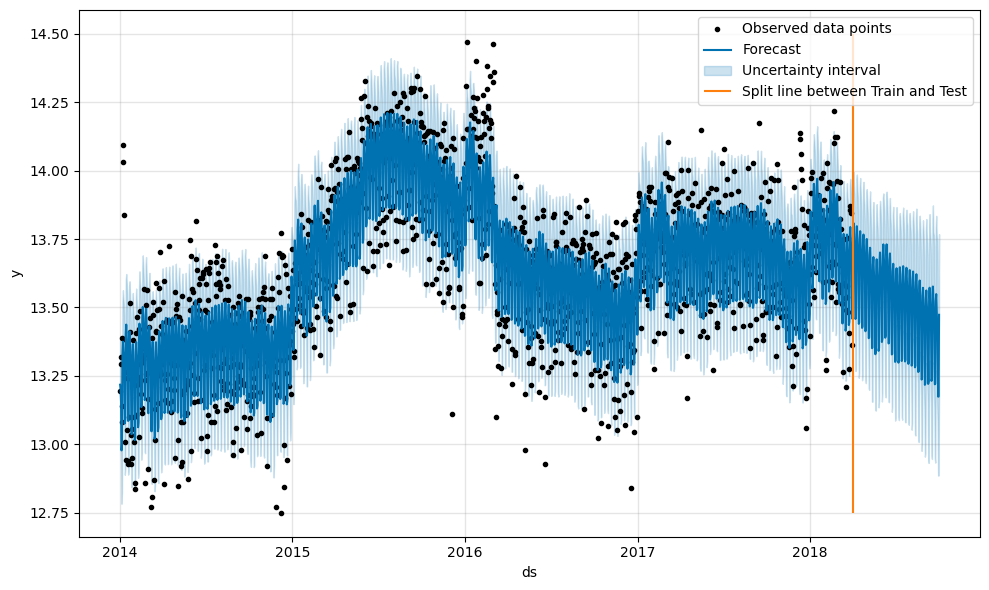

In [22]:
plt.figure(figsize=(20,8))
fig = model.plot(results)
plt.vlines(pd.Timestamp('2018-04-01'), 12.75, 14.5, color='tab:orange', label='Split line between Train and Test')
plt.legend()
plt.show()

In [23]:
fig = plot_components_plotly(model, results)
fig.update_layout(title='Trend, yearly seasonality and weekly seasonality')

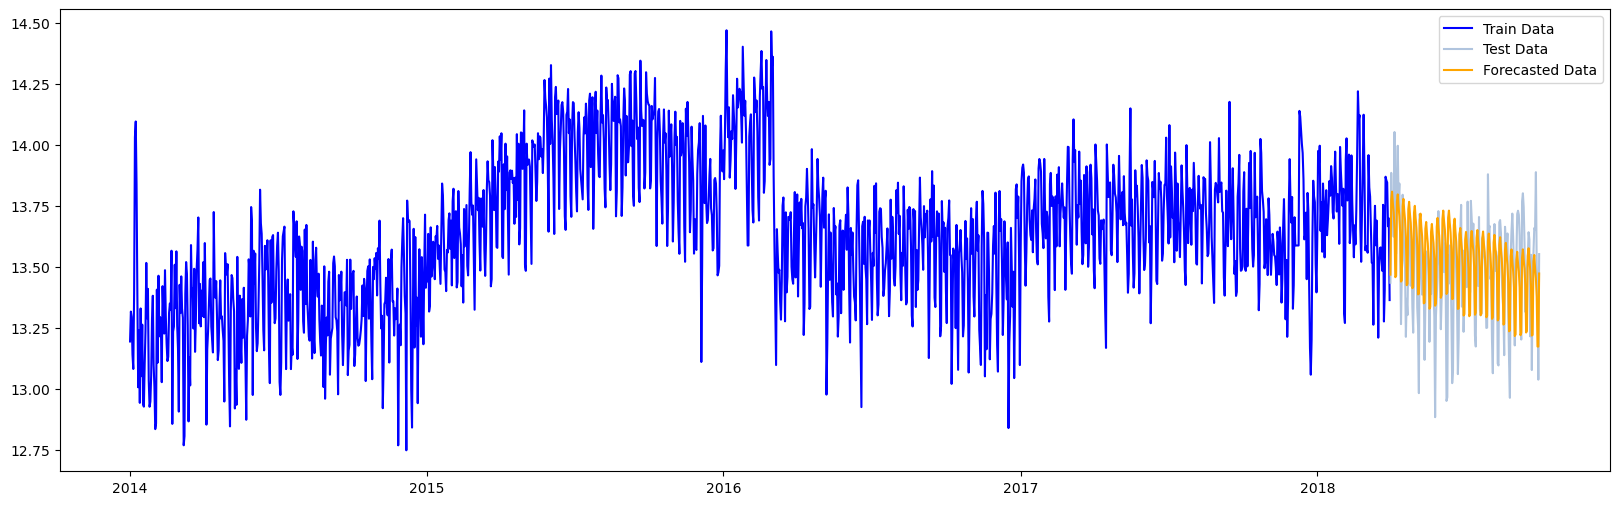

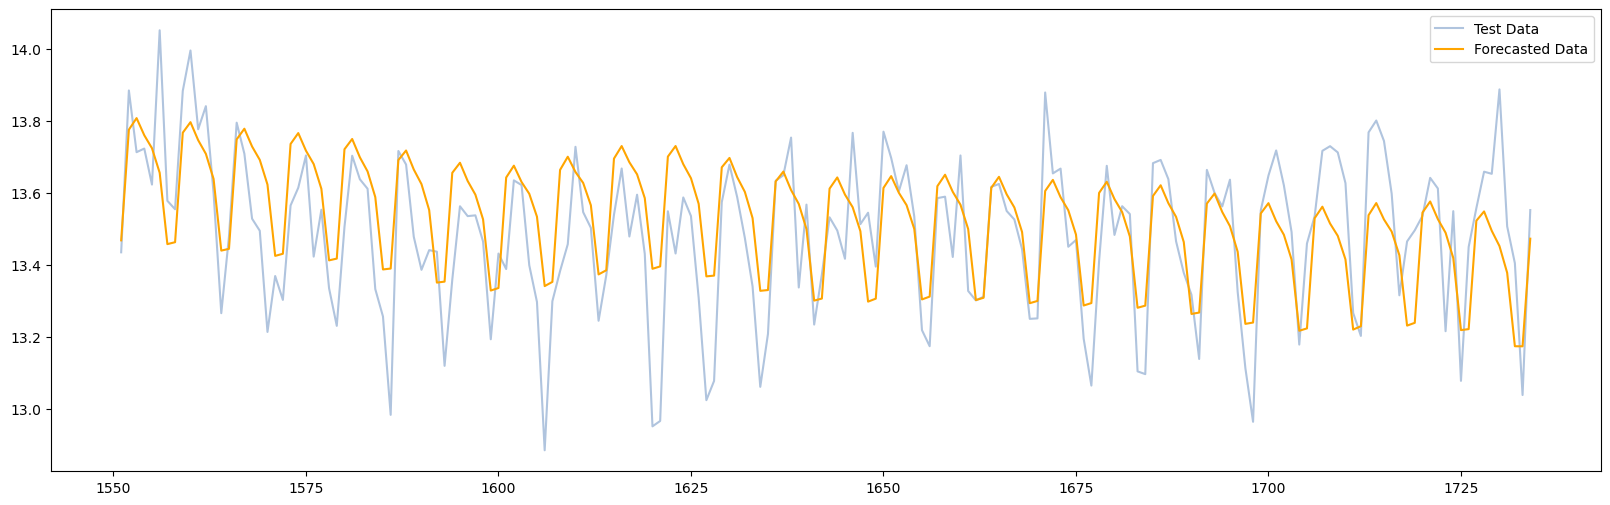

In [24]:
x_train = train_mobile['ds']
y_train = train_mobile['y']

x_test = test_mobile['ds']
y_test = test_mobile['y']

x_pred = df['ds'][-len(x_test):]
y_pred = results['yhat'][-len(y_test):]

plt.figure(figsize=(20,6))
plt.plot(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_test, y_test, color='lightsteelblue', label='Test Data')
plt.plot(x_pred, y_pred, color='orange', label='Forecasted Data')
plt.legend()
plt.show()

plt.figure(figsize=(20,6))
plt.plot(y_test, color='lightsteelblue', label='Test Data')
plt.plot(y_pred, color='orange', label='Forecasted Data')
plt.legend()
plt.show()

---
# RESULTS:

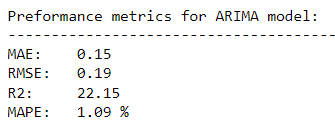
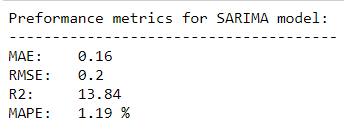
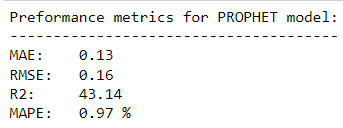


# CONCLUSION
All of the models demonstrated GOOD forecasting performance on the test dataset, as evidenced by both visual representation of the predictions and the comprehensive evaluation metrics used.

Note: 
1. SARIMA model gave same result with seasonal_order component s = 0 and of s = 7
2. These metrics are calculated on the test split of the dataset. In a real forecasting model, such tests can only be done after the forecast period.